# Image Information

The main objectives of this module are:

* Manipulate an image with Python, scikit-image and numpy.
* Process images at the pixel level.
* Compute and understand image histograms.
* Understand lossless compression & reconstruction.
* Understand the co-occurrence matrix.
* Use different colour representations.

## 1. Read & write an image

In this exercise, we will simply open an image file, display it, and save a copy. 

**Use the [scikit-image io](https://scikit-image.org/docs/dev/api/skimage.io.html) module to open, show & save a copy of the "camera.jpg" image.**

*Note: we use the **%matplotlib inline** command to display the image in the notebook. It would not be necessary if you execute the code in the terminal or in a standard IDE like PyCharm.*

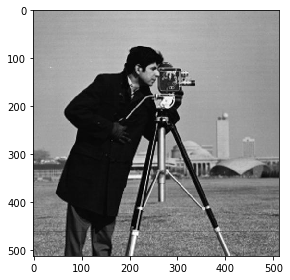

In [1]:
from skimage.io import imread,imsave,imshow
%matplotlib inline

## -- Your code here -- ##
im = imread("camera.jpg")
imshow(im)
imsave("camera_copy.jpg", im)

When you open an image with scikit-image, it is stored as a Numpy [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object. Numpy arrays are objects which can be easily manipulated for numerical computations.

**Using *ndarray* methods & attributes, answer the following questions about the "camera" image:**

1. What is the shape of the image? (width & height)
1. What is the minimum pixel value? What is the maximum pixel value?
1. What is the data type for each pixel?
1. Show only a 100x100 pixels window taken at the center of the image.

Shape :  (512, 512)
Min value :  0 max value :  255
Type :  uint8


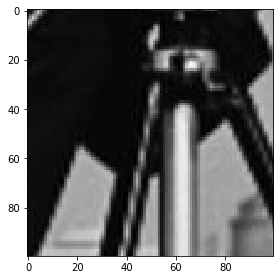

In [2]:
import numpy as np

## -- Your code here -- ##
print("Shape : ", im.shape)
print("Min value : ", np.amin(im), "max value : ", np.amax(im))
print("Type : ", im.dtype)
imshow(im[512//2-50:512//2+50, 512//2-50:512//2+50])

**Need more help? You can check the following videos:**

* [Image I/O](https://www.youtube.com/watch?v=rgJmji4rTpw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=1)
* [Image data type & color channels](https://www.youtube.com/watch?v=rIO1EJ--yeg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=2)

## 2. Image histograms

* Compute and plot the **histogram** and the **normalized histogram** of the example cameraman image given below.

You can use the [pyplot module](https://matplotlib.org/api/pyplot_api.html) from matplotlib to display plots & histograms.

Empty histogram
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Computed histogram
[ 207   90  143  184  247  365  617 1408 3236 4657 3874 5044 5873 6107
 6026 4381 2902 1504  861  648  566  506  479  459  397  398  390  397
  360  370  333  389  368  366  385  395  359  363  408  354  334  365
  364  326  307  277  255  295  261  250  249  271  259  270  254  301
  279  277  316  295  310  333  330  340  313  269  255  241  229  248
  234  216  222  243  220  222  198  188  204  209  234  216  235  210
  257  250  239  27

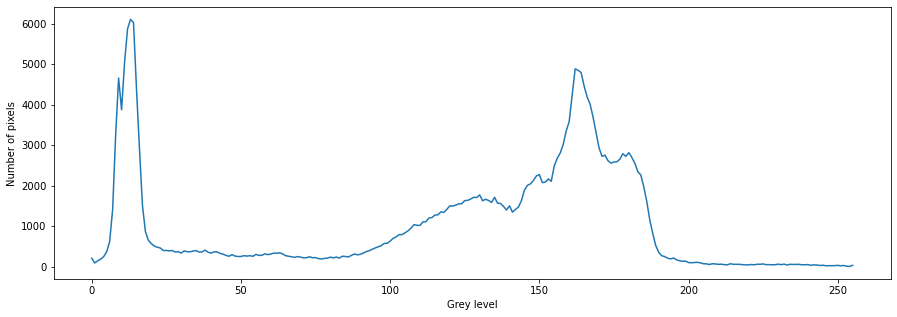

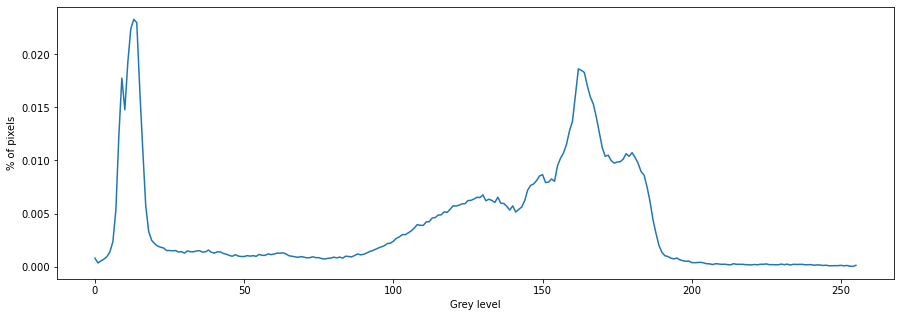

In [3]:
from matplotlib import pyplot as plt

## -- Your code here -- ##

#creating an array filled with 0 to prepare the histogram. Note that all 0 are of type int
im = imread("camera.jpg")
hist = np.zeros(256, dtype=int)
print("Empty histogram")
print(hist)

#computing and plotting the histogram
for v in range(0,256):
    hist[v] = (im==v).sum()

print("Computed histogram")
print(hist)
plt.figure(figsize=(15, 5))
plt.plot(hist)
plt.xlabel("Grey level")
plt.ylabel("Number of pixels")
plt.show()

"""
another (more explicit) way of computing the histogram. Note that this method is much longer

for i in range(0, 256):
    for j in im:
        for k in j:
            if i == k:
                hist[i] += 1
"""

#computing and plotting the normalized histogram
norm_hist = hist/hist.sum()
plt.figure(figsize=(15, 5))
plt.plot(norm_hist)
plt.xlabel("Grey level")
plt.ylabel("% of pixels")
plt.show()

Can you use the histogram to answer the following questions ? (you don't need to code anything here)

1. What is the average gray value of the cameraman ?
1. What is the average gray value of the sky ?
1. Is there more 'cameraman' pixels than 'sky' pixels ?

Compute and plot the **cumulated histogram**.

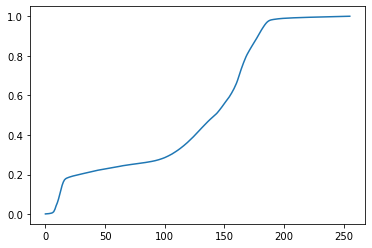

In [4]:
## -- Your code here -- ##

#creating an array filled with 0 to prepare the cumulated histogram
c_hist = np.zeros(256)

#computing and ploting the cumulated histogram
a = 0
for i in range(0, 256):
    a += norm_hist[i]
    c_hist[i] = a
plt.figure()
plt.plot(c_hist)
plt.show()

**Need more help? You can check the following videos:**

* [Computing a greyscale histogram](https://www.youtube.com/watch?v=g6hkHQbwB0I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=3)
* [Numpy arrays: operations, indexing, masking](https://www.youtube.com/watch?v=rPNTkrM2dZw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=4&t=253s)
* [Normalized and cumulative histograms](https://www.youtube.com/watch?v=uCgu0-KZt1o&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=5)

## 3. Image entropy

The "entropy" of a signal, in information theory, can generally be interpreted as the "number of bits required to encode the signal". It is a measure of the "amount of information" contained in the signal. Intuitively, a signal with a very narrow distribution (all values are close to each other) will have a very low entropy, while a signal with a wide distribution (the values are evenly distributed) will have a higher entropy.

1. Compute the image entropy of the cameraman image. The image entropy is given by $e = - \sum_{g=0}^N p(g) \log_2(p(g))$ where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values. Note that p(g) is directly given by the normalized histogram.
1. What is the entropy of a shuffled version of the cameraman ?

In [5]:
# -- Your code here -- #
def norm_histo(im):
    hist = np.zeros(256,)
    for i in range(0, 256):
        hist[i] = (im==i).sum()
    hist = hist/(hist.sum())
    return hist

def entropy(h):    
    return -(h[h>0]*np.log2(h[h>0])).sum()

#another (more explicit) way of computing the entropy
def entropy1(h):
    res = 0
    for i in h:
        res -= i*np.log2(i)
    return res

im = imread("camera.jpg")
print("Entropy of cameraman image :", entropy(norm_histo(im)))

#The entropy of the shuffled version of the cameraman will be identical because the entropy is directly calculated from the histogram

Entropy of cameraman image : 7.065452040742867


**Need more help? You can check the following videos:**

* [Computing the image entropy](https://www.youtube.com/watch?v=L2VtGt2FsRQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=6)

## 4. Image compression

Using the code below as a starting point:

* **Decompose an image** by recursively subsampling its dimensions and computing the remainders, such that each level of recursion performs the following operation:

<img src='PyramidCompression.png' width='75%'/>

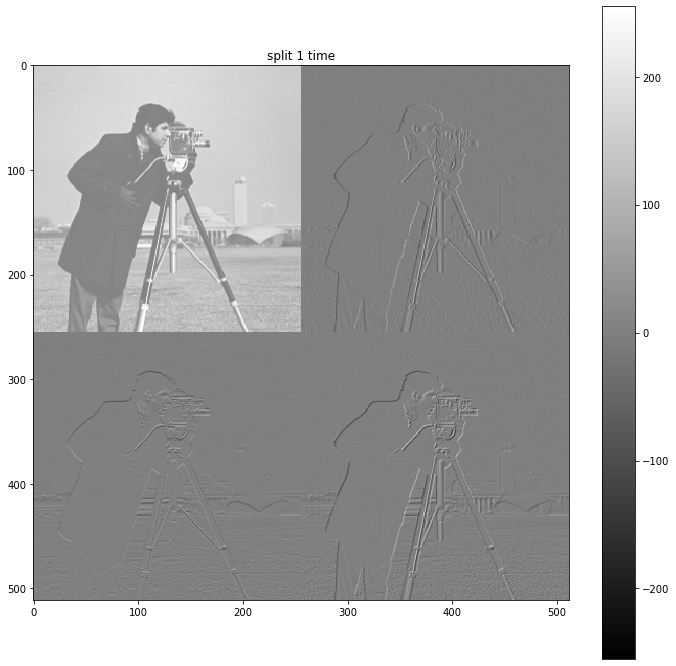

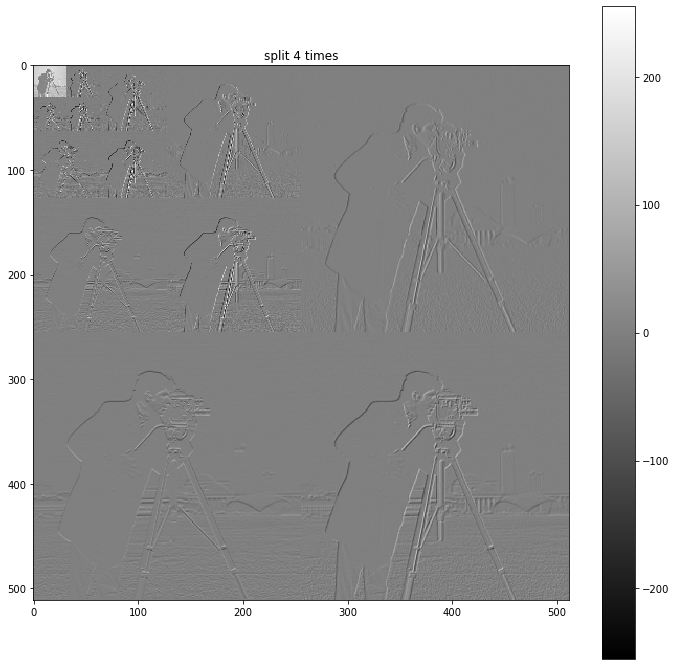

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

# Modify this method:
def split(im, level):
    if( level <= 0 ): return im # end recursion
    
    a = im[0:-1:2,0:-1:2]
    b = im[0:-1:2,1::2]-a
    c = im[1::2,0:-1:2]-a
    d = im[1::2,1::2]-a
    
    R = np.vstack((np.hstack((split(a,level-1),b)),np.hstack((c,d)))) # recursion call going down one level
    return R

im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow
im_compressed1 = split(im, 1)
im_compressed4 = split(im, 4)

plt.figure(figsize=(12,12))
# interpolation='nearest' -> don't try to interpolate values between pixels if the size of the display is different from the size of the image
# cmap=cm.gray -> display in grayscale
# vmin=-255 -> set "black" as -255
# vmax=255 -> set "white" as 255
plt.imshow(im_compressed1,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()
plt.title("split 1 time")
plt.show()

plt.figure(figsize=(12,12))
plt.imshow(im_compressed4,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()
plt.title("split 4 times")
plt.show()

**Compute how the image entropy evolves** with regards to the level of decomposition

In [7]:
# -- Your code here -- #
def norm_hist_neg(im):
    # Compute normalized histogram.
    h = np.zeros(512)
    for v in range(-255,256):
        h[v+255] = (im==(v)).sum()
    h /= h.sum()
    
    return h

for level in range(10):
    print("Level %d : entropy = %.4f"%(level,entropy(norm_hist_neg(split(im,level)))))

Level 0 : entropy = 7.0655
Level 1 : entropy = 5.6206
Level 2 : entropy = 4.8513
Level 3 : entropy = 4.6151
Level 4 : entropy = 4.5480
Level 5 : entropy = 4.5301
Level 6 : entropy = 4.5255
Level 7 : entropy = 4.5246
Level 8 : entropy = 4.5244
Level 9 : entropy = 4.5244


**Rebuild the original image** from the pyramid (allowing the selection the level of recursion)

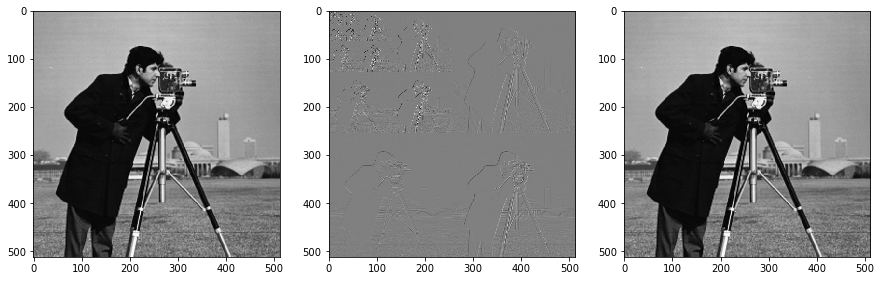

In [8]:
# -- Your code here -- #
def reconstruct(s, level):
    if level==0: return s
    
    # We first need to go "deep" into the top-left half
    m = s.shape[0]//2
    n = s.shape[1]//2
    a = reconstruct(s[0:m,0:n],level-1)

    # Once we have reconstructed the top left half, we can use the remainders to reconstruct the original.
    b = s[0:m,n:]
    c = s[m:,0:n]
    d = s[m:,n:]

    r = np.zeros(s.shape)
    r[0:-1:2,0:-1:2]=a
    r[0:-1:2,1::2]=b+a
    r[1::2,0:-1:2]=c+a
    r[1::2,1::2]=d+a
    
    return r

# Testing:
im = imread('camera.jpg').astype(int)
compressed = split(im,8)
rec = reconstruct(compressed,8)

plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(im,interpolation='nearest',cmap=plt.cm.gray,vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(compressed,interpolation='nearest',cmap=plt.cm.gray,vmin=-255, vmax=255)
plt.subplot(1,3,3)
plt.imshow(rec,interpolation='nearest',cmap=plt.cm.gray,vmin=0, vmax=255)
plt.show()

**Need more help? You can check the following videos:**

* [Subsampling and rescaling](https://www.youtube.com/watch?v=rYNUby5bIlA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=7)
* [Pyramid compression](https://www.youtube.com/watch?v=yrsyF8T5OAU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=8)

## 5. Co-occurrence matrix

While the histogram of an image is independent of the position of the pixels, the co-occurrence matrix gives us information about their spatial distribution.

A co-occurrence matrix is computed for a given displacement, looking at the pair of values spatially separated by that displacement. The co-occurrence matrix is a square matrix, its size given by the number of possible values that a pixels can take in the image.

1. Compute de [cooccurrence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a chosen displacement $(\Delta x,\Delta y)$ (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix) in scikit-image)
1. What is the entropy of the cooccurrence matrix ?
1. How does this entropy evolve if we increase the displacement ?

(256, 256)


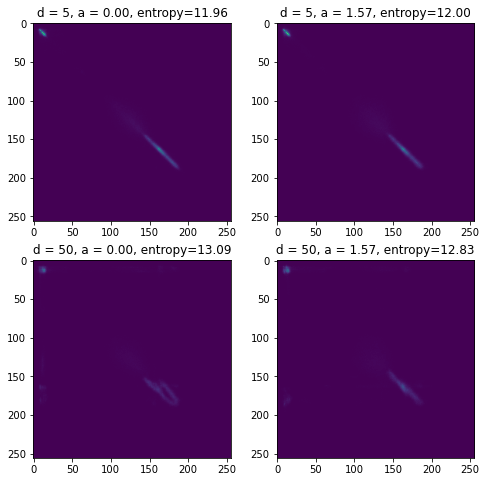

In [9]:
from skimage.feature import greycomatrix

# -- Your code here -- #
im = imread('camera.jpg')

distances = [5,50] # Distances in pixels that we want to check
angles = [0, np.pi/2] # Angles in radians that we want to check

co_matrices = greycomatrix(im, distances, angles)
print(co_matrices[:,:,0,0].shape)

def norm_gcmat(gcmat):
    return gcmat/gcmat.sum()

plt.figure(figsize=(8,8))

i = 1
for idd,d in enumerate(distances):
    for ida,a in enumerate(angles):
        plt.subplot(2,2,i)
        plt.imshow(co_matrices[:,:,idd,ida], vmin=co_matrices.min(), vmax=co_matrices.max()) # Give the same scale to all images!
        plt.title('d = %d, a = %.2f, entropy=%.2f'%(d,a,entropy(norm_gcmat(co_matrices[:,:,idd,ida]))))
        i += 1
plt.show()

**Need more help? You can check the following videos:**

* [Grayscale co-occurence matrix](https://www.youtube.com/watch?v=cq0Br3zB2AU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=9)

## 6. Colour representations

A colour image is typically encoded with three channels: Red, Green and Blue. In the example below, we open the *immunohistochemistry()* example image and split it into the three channels, which we display: 

In [10]:
from skimage.data import immunohistochemistry

im = immunohistochemistry() # scikit-image method to load the example image
print(im.shape,im.dtype)
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

(512, 512, 3) uint8


1. Compute & show the color histograms
1. Convert the image to the HSV color space & compute the HSV histograms. [See the skimage documentation for reference on color transformation](http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2hsv)
1. Find a method to isolate the brown cells in the immunohistochemistry image
    1. In the RGB space
    1. In the HSV space

<Figure size 432x288 with 0 Axes>

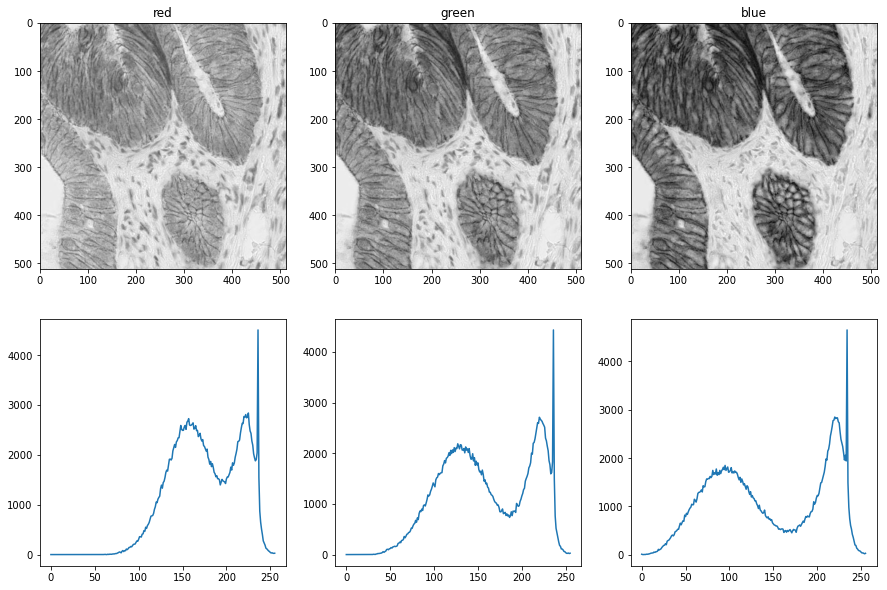

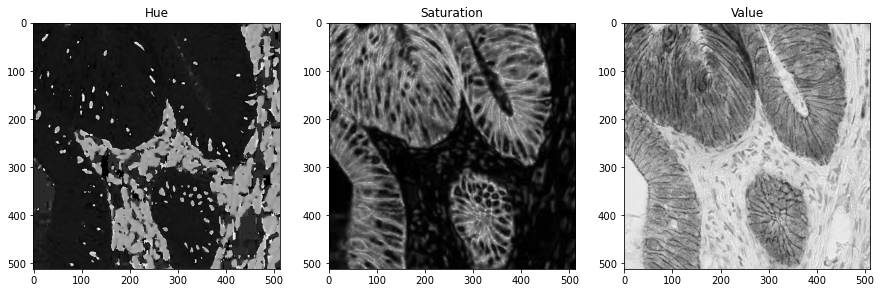

Red channel: [157, 225, 236]
Green channel: [127, 220, 236]
Blue channel: [95, 220, 234]
[[[156 118  81]
  [163 125  88]]

 [[141 105  69]
  [144 108  72]]]


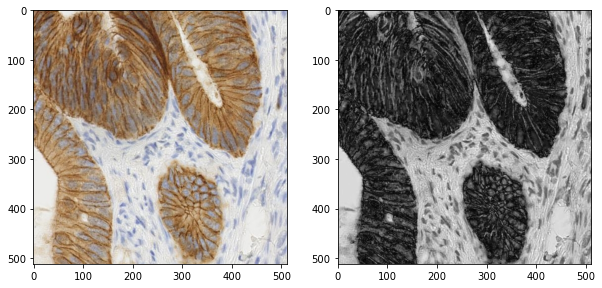

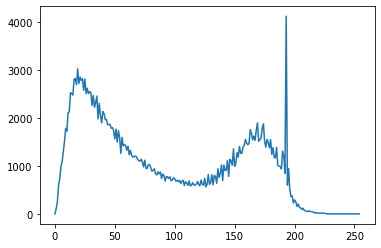

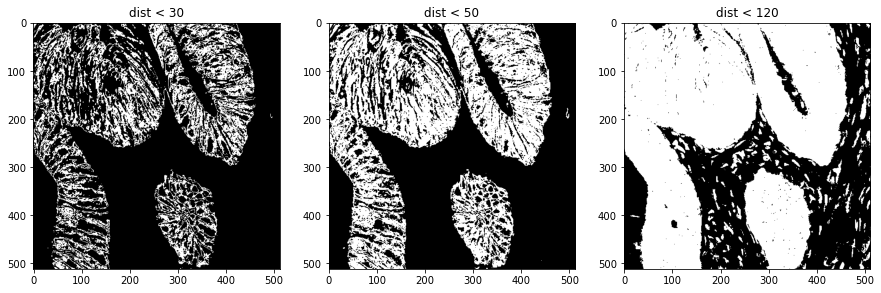

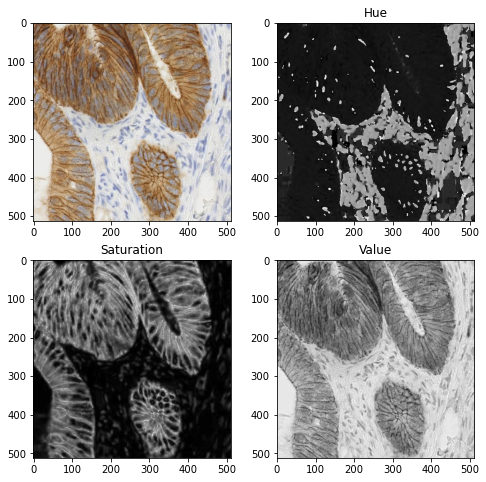

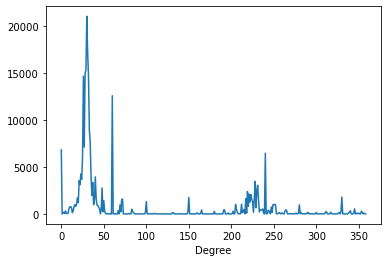

Global maximum: 30


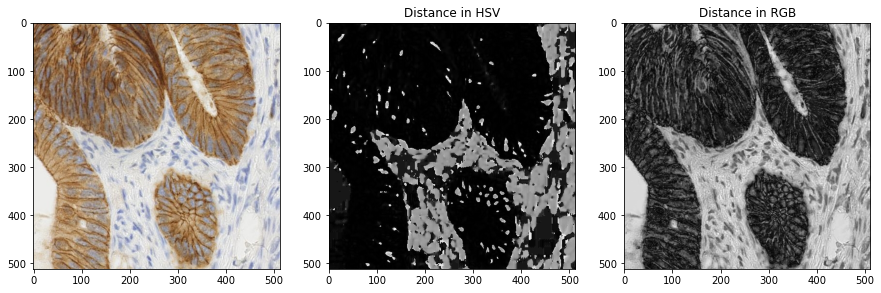

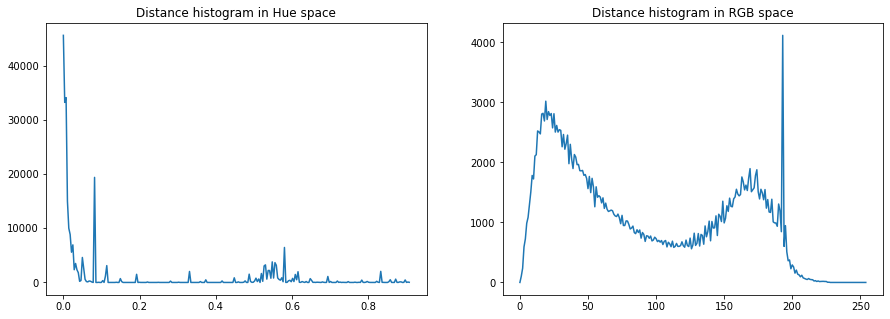

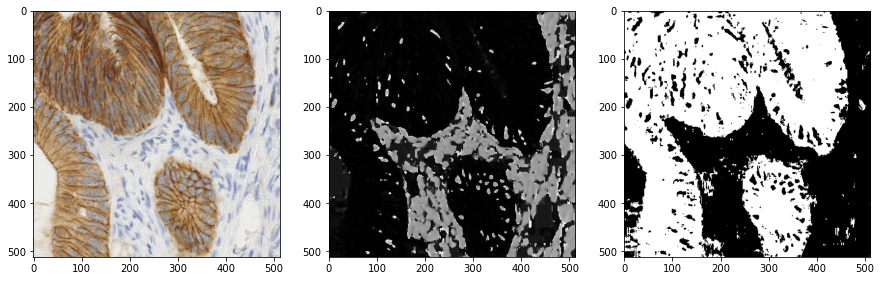

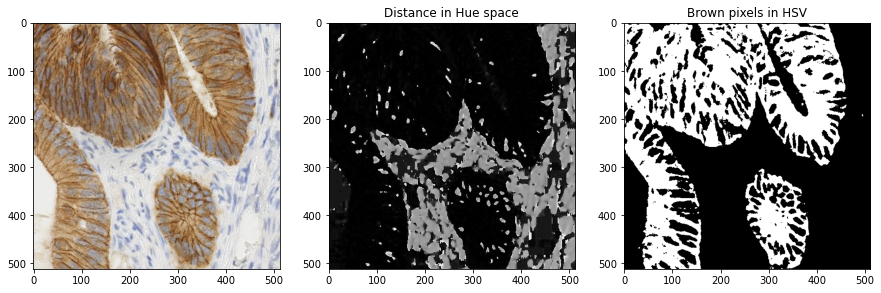

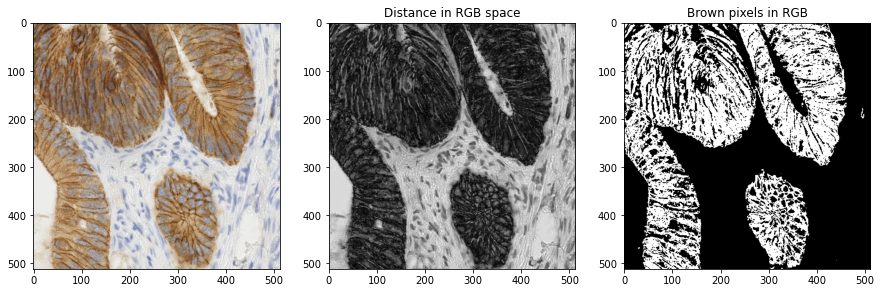

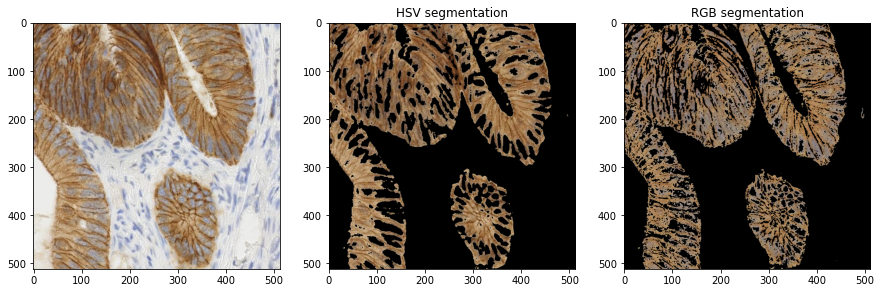

In [11]:
# -- Your code here -- #
from skimage.color import rgb2hsv

def histo(im):
    hist = np.zeros(256,)
    for i in range(0, 256):
        hist[i] = (im==i).sum()
    return hist

hist_r = histo(r)
hist_g = histo(g)
hist_b = histo(b)

plt.gray()
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(r, vmin=0, vmax=255)
plt.title('red')
plt.subplot(2,3,2)
plt.imshow(g, vmin=0, vmax=255)
plt.title('green')
plt.subplot(2,3,3)
plt.imshow(b, vmin=0, vmax=255)
plt.title('blue')
plt.subplot(2,3,4)
plt.plot(hist_r)
plt.subplot(2,3,5)
plt.plot(hist_g)
plt.subplot(2,3,6)
plt.plot(hist_b)
plt.show()

hsv = rgb2hsv(im)

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(hsv[:,:,0],cmap=plt.cm.gray)
plt.title('Hue')
plt.subplot(1,3,2)
plt.imshow(hsv[:,:,1],cmap=plt.cm.gray)
plt.title('Saturation')
plt.subplot(1,3,3)
plt.imshow(hsv[:,:,2],cmap=plt.cm.gray)
plt.title('Value')
plt.show()

def find_peaks(h):
    peaks = []
    for v in range(10,len(h)-10):
        if( h[v] == h[v-10:v+10].max() and h[v] > 0 ): peaks += [v]
    return peaks

print("Red channel:",find_peaks(hist_r))
print("Green channel:",find_peaks(hist_g))
print("Blue channel:",find_peaks(hist_b))

print(im[:2,:2,:])

ref_brown = np.array([157.,127.,95.])
diff_squared = (im.astype('float')-ref_brown)**2
dist = np.sqrt((diff_squared).sum(axis=2))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(dist)
plt.show()

hist_d,bins_d = np.histogram(dist.flatten(),range(256))
plt.figure()
plt.plot(bins_d[:-1], hist_d)
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(dist<30)
plt.title('dist < 30')
plt.subplot(1,3,2)
plt.imshow(dist<50)
plt.title('dist < 50')
plt.subplot(1,3,3)
plt.imshow(dist<120)
plt.title('dist < 120')
plt.show()

hsv = rgb2hsv(im)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(im)
plt.subplot(2,2,2)
plt.imshow(hsv[:,:,0],cmap=plt.cm.gray)
plt.title('Hue')
plt.subplot(2,2,3)
plt.imshow(hsv[:,:,1],cmap=plt.cm.gray)
plt.title('Saturation')
plt.subplot(2,2,4)
plt.imshow(hsv[:,:,2],cmap=plt.cm.gray)
plt.title('Value')
plt.show()

hist_h,bins_h = np.histogram(hsv[:,:,0].flatten()*360, bins=range(360))

plt.figure()
plt.plot(hist_h)
plt.xlabel('Degree')
plt.show()

global_max = hist_h.argmax()
print("Global maximum: %d"%global_max)

ref_brown = global_max/360

d_h = np.abs(hsv[:,:,0]-ref_brown) #1-D distance in the H space

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(d_h)
plt.title('Distance in HSV')
plt.subplot(1,3,3)
plt.imshow(dist)
plt.title('Distance in RGB')
plt.show()

hist_dh,bins_dh = np.histogram(d_h.flatten(),256)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(bins_dh[:-1],hist_dh)
plt.title('Distance histogram in Hue space')
plt.subplot(1,2,2)
plt.plot(hist_d)
plt.title('Distance histogram in RGB space')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(d_h)
plt.subplot(1,3,3)
plt.imshow(d_h < 0.025)
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(d_h)
plt.title('Distance in Hue space')
plt.subplot(1,3,3)
plt.imshow((d_h < 0.025)*(hsv[:,:,1]>0.3))
plt.title('Brown pixels in HSV')
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(dist)
plt.title('Distance in RGB space')
plt.subplot(1,3,3)
plt.imshow(dist<50)
plt.title('Brown pixels in RGB')
plt.show()

mask_hsv = (d_h < 0.025)*(hsv[:,:,1]>0.3)
mask_rgb = dist<50

im_hsv = im.copy()
im_hsv[mask_hsv==False,:] = 0
im_rgb = im.copy()
im_rgb[mask_rgb==False,:] = 0

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im)
plt.subplot(1,3,2)
plt.imshow(im_hsv)
plt.title('HSV segmentation')
plt.subplot(1,3,3)
plt.imshow(im_rgb)
plt.title('RGB segmentation')
plt.show()

**Need more help? You can check the following videos:**

* [RGB vs HSV](https://www.youtube.com/watch?v=oVpSTZtZQNM&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=10)
* [Distances: image space and colour space](https://www.youtube.com/watch?v=f6aJJldc38E&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=11)
* [Creating a Magic Wand](https://www.youtube.com/watch?v=Aw--_cJ7o5I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=12)

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

<img src='ex_wm.jpg' width="500px" />

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


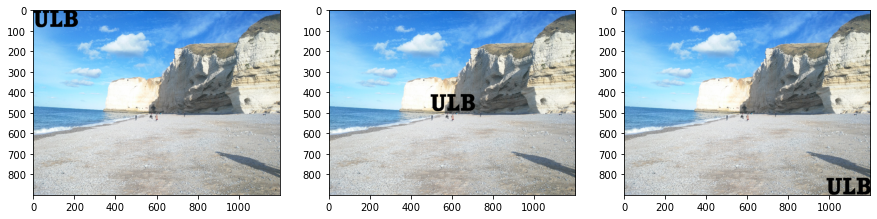

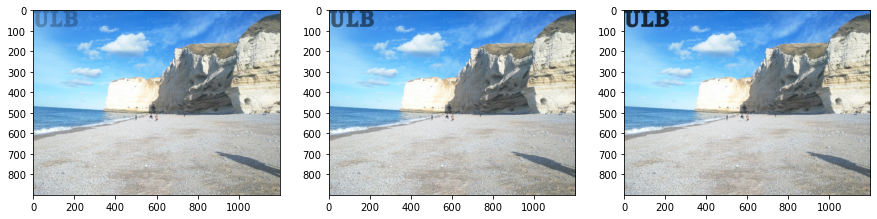

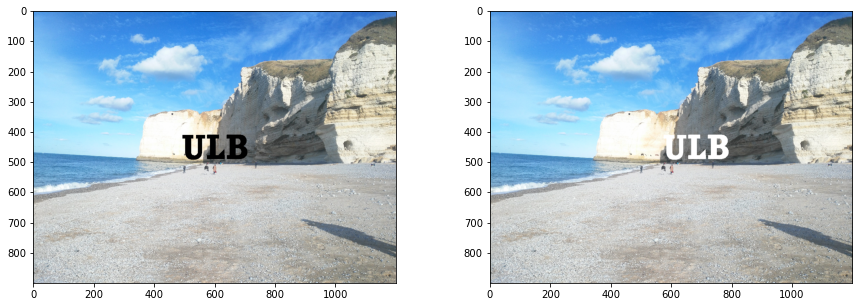

In [3]:
import numpy as np
from skimage.color import rgb2hsv
from skimage.io import imread,imsave,imshow
from matplotlib import pyplot as plt

#Returns the mean value of the hue from the image given as argument
def get_mean(im):
    hsv = rgb2hsv(im)
    hue = hsv[:, :, 2]
    mean = hue.sum()/(im.shape[0]*im.shape[1])
    return mean

#Places the watermark image as white pixels, (posX, posY) being the position of the top left corner of the watermark
#The blending (values from 0 to 1) corresponds to the transparency effect of the watermark
#Im_start is the image on which the watermark im_wat is to be applied
def place_watermark_white(posX, posY, im_start, im_wat, blending):
    im_ret = im_start.copy()
    for i in range(0, 85):
        for j in range(0, 219):
            if im_wat[i, j] == 255:
                im_ret[i+posX, j+posY, :] = im_wat[i, j]*blending + im_start[i+posX, j+posY, :]*(1-blending)
    return im_ret

#Works exactly the same way as place_watermak_white but the watermark pixels are black instead of white
def place_watermark_black(posX, posY, im_start, im_wat, blending):
    im_ret = im_start.copy()
    for i in range(0, 85):
        for j in range(0, 219):
            if im_wat[i, j] == 255:
                im_ret[i+posX, j+posY, :] = (im_wat[i, j]-255)*blending + im_start[i+posX, j+posY, :]*(1-blending)
    return im_ret

#This function decided, based on the result of the mean() function, whether the watermark should appear in white or in black
def place_watermark(posX, posY, im_start, im_wat, blending):
    im_ret = im_start.copy()
    mean = get_mean(im_ret[posX:posX+85, posY:posY+219, :])
    if mean < 0.5:
        im_ret = place_watermark_white(posX, posY, im_start, im_wat, blending)
    elif mean >= 0.5:
        im_ret = place_watermark_black(posX, posY, im_start, im_wat, blending)
    return im_ret

#Opening the images
im_wat = imread("watermark.png")
im_start = imread("etretat.jpg")

#Placing the watermark respectively in the bottom right corner, in the top left corner and in the center of the image
im_lower_right = place_watermark(900-85, 1200-219, im_start, im_wat, 1)
im_upper_left = place_watermark(0, 0, im_start, im_wat, 1)
im_middle = place_watermark(450-42, 600-109, im_start, im_wat, 1)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im_upper_left)
plt.subplot(1,3,2)
plt.imshow(im_middle)
plt.subplot(1,3,3)
plt.imshow(im_lower_right)
plt.show()

#Testing different values for the blending
im_blended1 = place_watermark(0, 0, im_start, im_wat, 0.25)
im_blended2 = place_watermark(0, 0, im_start, im_wat, 0.5)
im_blended3 = place_watermark(0, 0, im_start, im_wat, 0.75)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im_blended1)
plt.subplot(1,3,2)
plt.imshow(im_blended2)
plt.subplot(1,3,3)
plt.imshow(im_blended3)
plt.show()

#Placing the watermark at the right of the center of the image, where the watermark should automatically appear in white
im_wat_white = place_watermark(450-42, 680-109, im_start, im_wat, 1)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(im_middle)
plt.subplot(1,2,2)
plt.imshow(im_wat_white)
plt.show()

#Recreating the image given as example in order to save it
im_to_save = place_watermark(450-42, 600-109, im_start, im_wat, 0.5)

imsave("lab1.jpg", im_to_save)